# 12시까지 프로젝트 진행
# 12시~13시 점심시간
# 13시~17시 프로젝트 진행

---

# 1. Coefficient

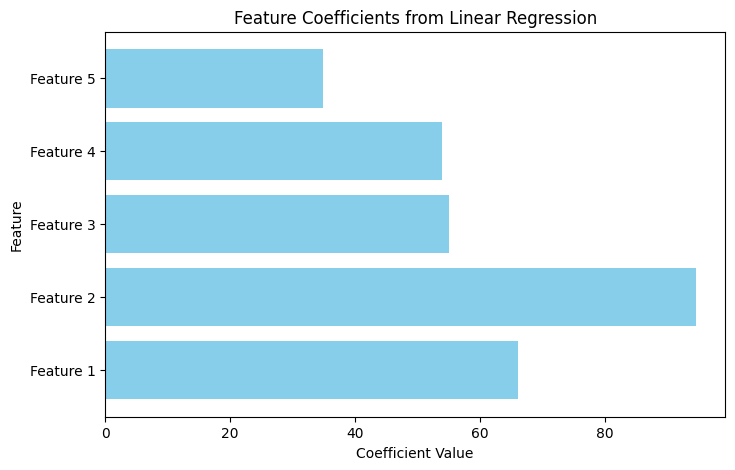

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression

# 샘플 데이터 생성
X, y = make_regression(n_samples=100, n_features=5, noise=10, random_state=42)

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 선형 회귀 모델 훈련
model = LinearRegression()
model.fit(X_scaled, y)

# 회귀 계수 가져오기
coefficients = model.coef_
feature_names = [f'Feature {i+1}' for i in range(X.shape[1])]

# 특성 중요도 시각화
plt.figure(figsize=(8, 5))
plt.barh(feature_names, coefficients, color='skyblue')
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Coefficients from Linear Regression")
plt.show()

---

# 2. Feature Importance

Baseline Accuracy: 1.0000


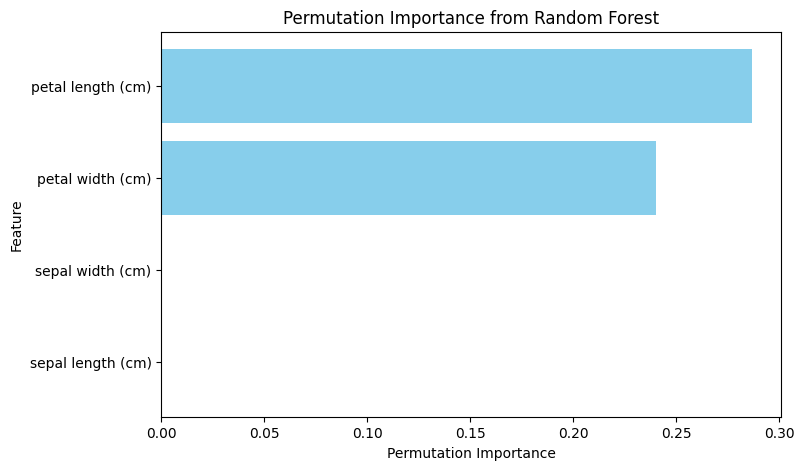

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance

# 데이터 로드 및 분할
data = load_iris()
X, y = data.data, data.target
feature_names = data.feature_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 학습
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 원래 모델 성능 확인
y_pred = model.predict(X_test)
baseline_acc = accuracy_score(y_test, y_pred)
print(f"Baseline Accuracy: {baseline_acc:.4f}")

# Permutation Importance 계산
perm_importance = permutation_importance(model, X_test, y_test, scoring='accuracy', random_state=42)

# 시각화
sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(8, 5))
plt.barh(np.array(feature_names)[sorted_idx], perm_importance.importances_mean[sorted_idx], color='skyblue')
plt.xlabel("Permutation Importance")
plt.ylabel("Feature")
plt.title("Permutation Importance from Random Forest")
plt.show()

---

# 3. LIME

### 3.1 정형데이터 LIME


In [ ]:
!pip install lime -q


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from lime.lime_tabular import LimeTabularExplainer

# 데이터 로드 및 분할
data = load_iris()
X, y = data.data, data.target
feature_names = data.feature_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 학습
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# LIME 설명기 생성
explainer = LimeTabularExplainer(X_train, feature_names=feature_names, class_names=data.target_names, discretize_continuous=True)

# 특정 샘플 선택
sample_idx = 5  # X_test에서 5번째 샘플 선택
exp = explainer.explain_instance(X_test[sample_idx], model.predict_proba, num_features=4)

# 설명 결과 시각화
exp.show_in_notebook()

### 3.2 이미지 데이터 LIME

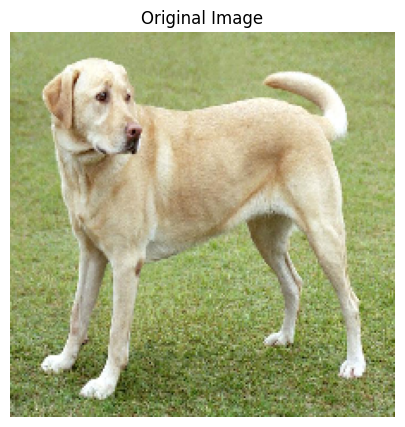

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━

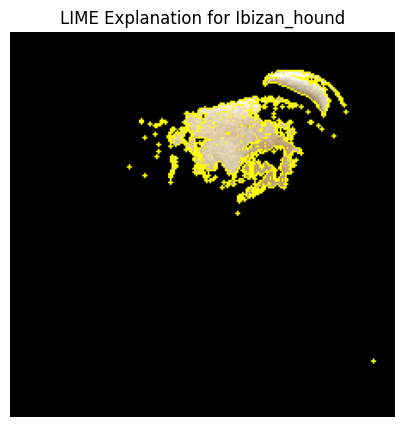

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from lime import lime_image
from skimage.segmentation import mark_boundaries

# 📌 사전 학습된 ResNet50 모델 로드
model = ResNet50(weights='imagenet')

# 📌 오픈된 샘플 이미지 다운로드 (ImageNet 샘플 이미지 사용)
img_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/YellowLabradorLooking_new.jpg"
img_path = tf.keras.utils.get_file("sample_image.jpg", img_url)

# 📌 이미지 로드 및 전처리 함수
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))  # 224x224 크기로 변환
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # 배치 차원 추가
    img_array = preprocess_input(img_array)  # ResNet50에 맞게 정규화
    return img, img_array  # 원본 이미지와 전처리된 이미지 반환

# 📌 LIME 설명기 생성
explainer = lime_image.LimeImageExplainer()

# 📌 예측 함수 정의
def predict_fn(images):
    images = np.array(images)  # LIME이 넘겨준 이미지 리스트를 NumPy 배열로 변환
    return model.predict(preprocess_input(images))  # 모델 예측 수행

# 📌 이미지 전처리 (원본 + 모델 입력용 이미지 반환)
original_img, img_array = load_and_preprocess_image(img_path)

# 📌 원본 이미지 출력
plt.figure(figsize=(8, 5))
plt.imshow(original_img)
plt.title("Original Image")
plt.axis("off")
plt.show()

# 📌 LIME 실행
explanation = explainer.explain_instance(
    image.img_to_array(image.load_img(img_path, target_size=(224, 224))),  # 원본 이미지 입력
    predict_fn,  # 예측 함수
    top_labels=5,  # 가장 중요한 상위 5개 클래스만 분석
    hide_color=0,
    num_samples=1000  # 샘플링 개수 (클수록 정확하지만 느려짐)
)

# 📌 가장 높은 확률의 클래스 가져오기
top_label = explanation.top_labels[0]

# 📌 이미지에 대한 마스크 생성
temp, mask = explanation.get_image_and_mask(
    label=top_label,
    positive_only=True,  # 중요한 부분만 표시
    num_features=5,  # 상위 5개 영역 강조
    hide_rest=True  # 중요하지 않은 부분 흐리게
)

# 📌 LIME 설명 결과 출력
plt.figure(figsize=(8, 5))
plt.imshow(mark_boundaries(temp / 255.0, mask))
plt.title(f"LIME Explanation for {decode_predictions(model.predict(img_array), top=1)[0][0][1]}")
plt.axis("off")
plt.show()

---

# 4. SHAP

### 정형 데이터 SHAP

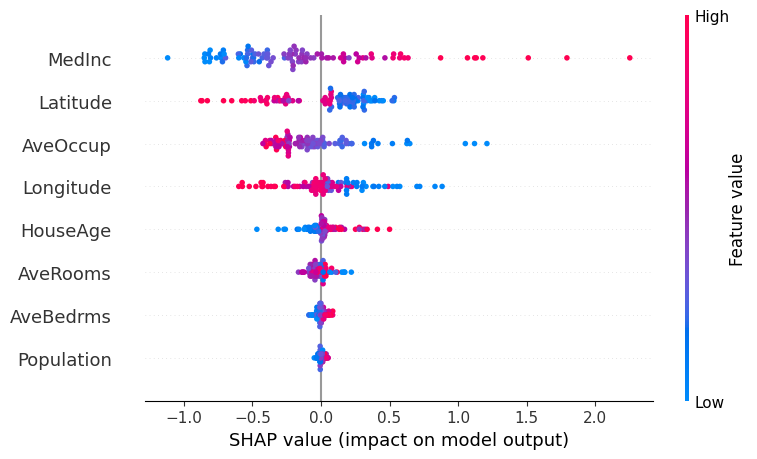

In [ ]:
import shap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# 데이터 로드 및 분할 (California Housing 데이터 사용)
california = fetch_california_housing()
X, y = california.data, california.target
feature_names = california.feature_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 학습
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# SHAP 값 계산
subset_size = 100  # 일부 샘플만 사용
X_test_subset = X_test[:subset_size]
explainer = shap.TreeExplainer(model)
shap_values = explainer(X_test_subset, check_additivity=False)  # check_additivity=False 추가

# 📌 개별 예측 결과 시각화
shap.initjs()
shap.plots.force(shap_values[0])  # X_test_subset의 첫 번째 샘플 예측 설명

# 📌 전체 데이터에서 중요한 변수 시각화
shap.summary_plot(shap_values, X_test_subset, feature_names=feature_names)

### 4.2 이미지 데이터 SHAP

In [ ]:
import json
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
import shap

# load pre-trained model and data
model = ResNet50(weights="imagenet")
X, y = shap.datasets.imagenet50()

url = "https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json"
with open(shap.datasets.cache(url)) as file:
    class_names = [v[1] for v in json.load(file).values()]
print("Number of ImageNet classes:", len(class_names))
print("Class names:", class_names)

Number of ImageNet classes: 1000
Class names: ['tench', 'goldfish', 'great_white_shark', 'tiger_shark', 'hammerhead', 'electric_ray', 'stingray', 'cock', 'hen', 'ostrich', 'brambling', 'goldfinch', 'house_finch', 'junco', 'indigo_bunting', 'robin', 'bulbul', 'jay', 'magpie', 'chickadee', 'water_ouzel', 'kite', 'bald_eagle', 'vulture', 'great_grey_owl', 'European_fire_salamander', 'common_newt', 'eft', 'spotted_salamander', 'axolotl', 'bullfrog', 'tree_frog', 'tailed_frog', 'loggerhead', 'leatherback_turtle', 'mud_turtle', 'terrapin', 'box_turtle', 'banded_gecko', 'common_iguana', 'American_chameleon', 'whiptail', 'agama', 'frilled_lizard', 'alligator_lizard', 'Gila_monster', 'green_lizard', 'African_chameleon', 'Komodo_dragon', 'African_crocodile', 'American_alligator', 'triceratops', 'thunder_snake', 'ringneck_snake', 'hognose_snake', 'green_snake', 'king_snake', 'garter_snake', 'water_snake', 'vine_snake', 'night_snake', 'boa_constrictor', 'rock_python', 'Indian_cobra', 'green_mamba'

In [ ]:
len("# python function to get model output; replace this function with your own model")

80

In [ ]:
# python function to get model output; replace this function with your own model function.
def f(x):
    tmp = x.copy()
    preprocess_input(tmp)
    return model(tmp)


# define a masker that is used to mask out partitions of the input image.
masker = shap.maskers.Image("inpaint_telea", X[0].shape)

# create an explainer with model and image masker
explainer = shap.Explainer(f, masker, output_names=class_names)

# here we explain two images using 500 evaluations of the underlying model to estimate the SHAP values
shap_values = explainer(X[1:3], max_evals=100, batch_size=50, outputs=shap.Explanation.argsort.flip[:4])

  0%|          | 0/98 [00:00<?, ?it/s]

PartitionExplainer explainer: 3it [00:13, 13.47s/it]               


In [ ]:
# python function to get model output; replace this function with your own model function.
def f(x):
    tmp = x.copy()
    preprocess_input(tmp)
    return model(tmp)


# define a masker that is used to mask out partitions of the input image.
masker_blur = shap.maskers.Image("blur(128,128)", X[0].shape)

# create an explainer with model and image masker
explainer_blur = shap.Explainer(f, masker_blur, output_names=class_names)

# here we explain two images using 500 evaluations of the underlying model to estimate the SHAP values
shap_values_fine = explainer_blur(X[1:3], max_evals=5000, batch_size=50, outputs=shap.Explanation.argsort.flip[:4])

  0%|          | 0/4998 [00:00<?, ?it/s]

PartitionExplainer explainer:  50%|█████     | 1/2 [00:00<?, ?it/s]

  0%|          | 0/4998 [00:00<?, ?it/s]

PartitionExplainer explainer: 3it [01:23, 41.72s/it]


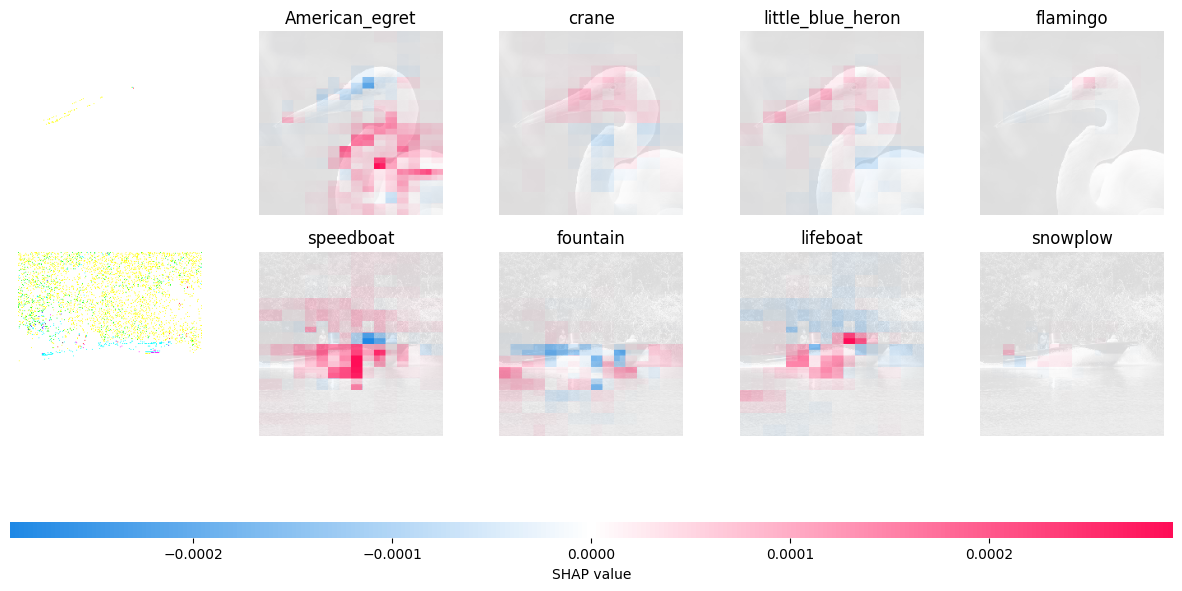

In [ ]:
shap.image_plot(shap_values_fine)
